  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        

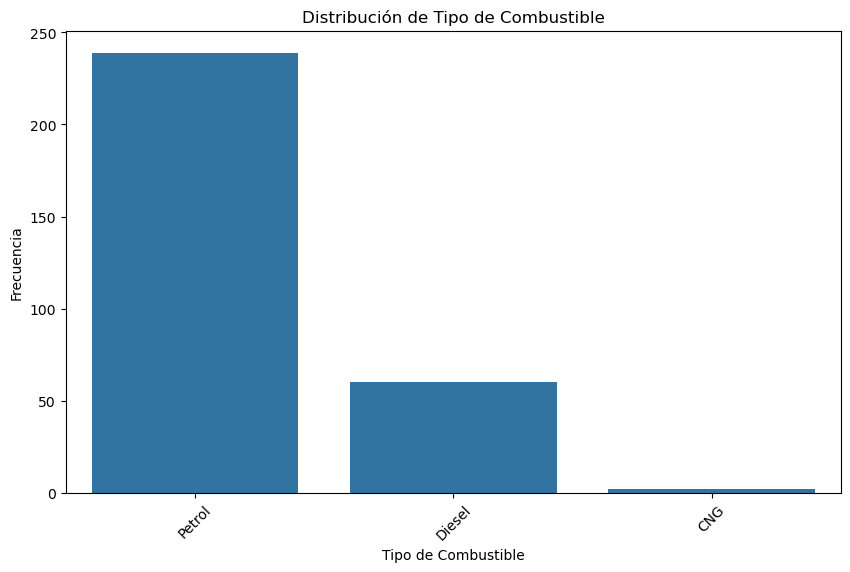

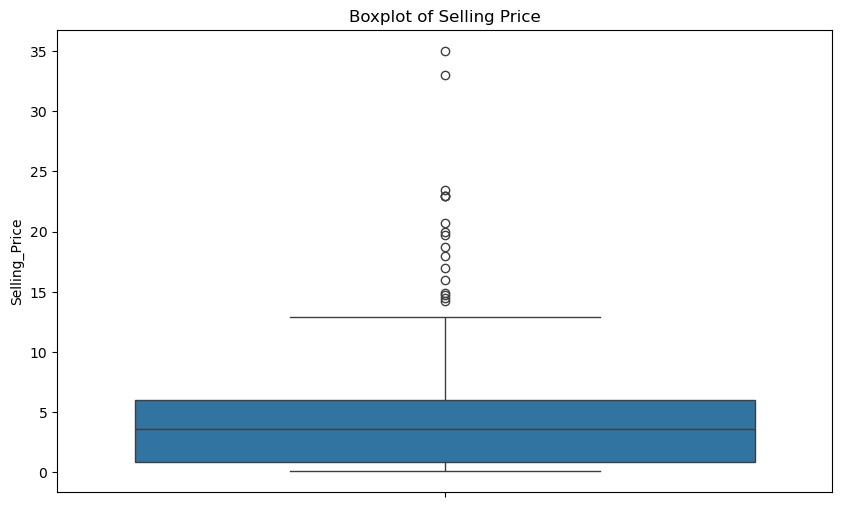

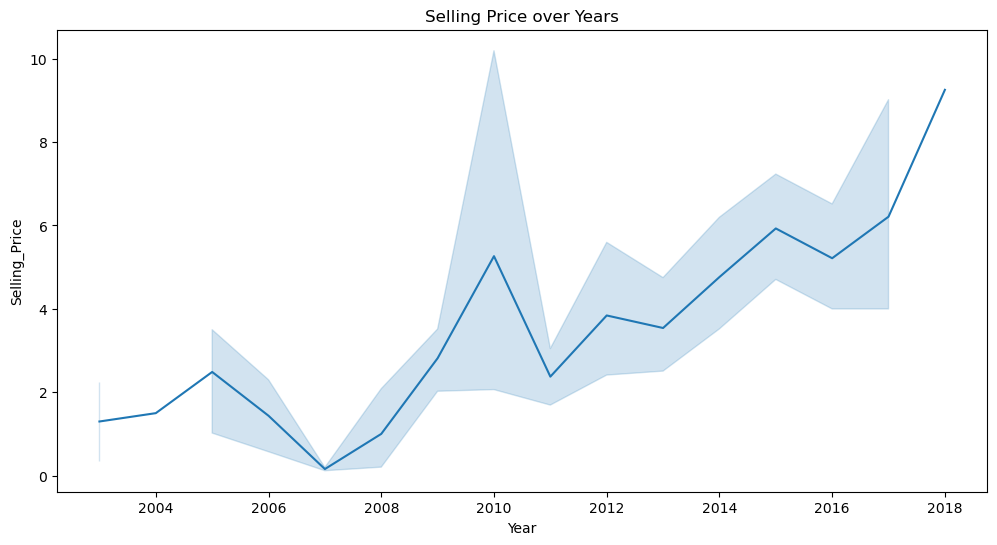

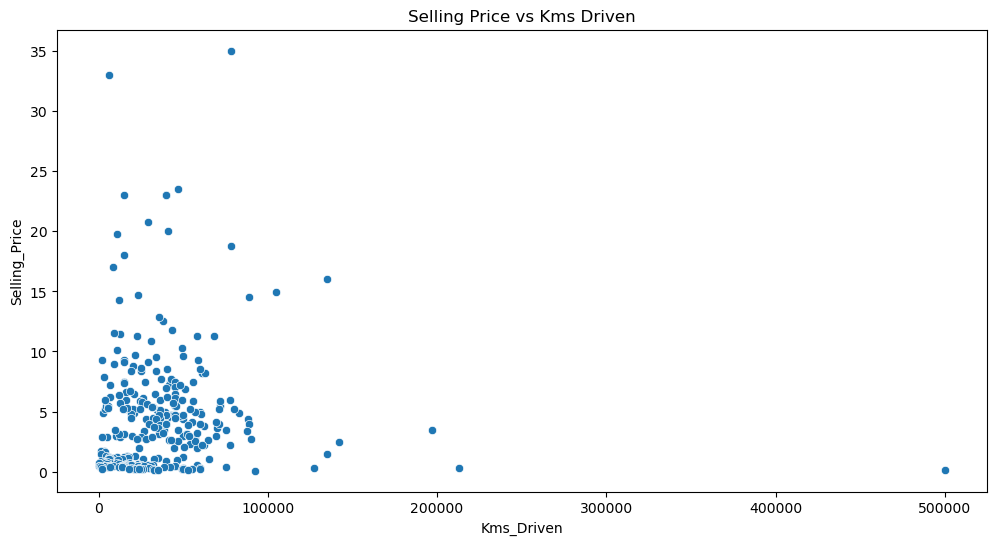

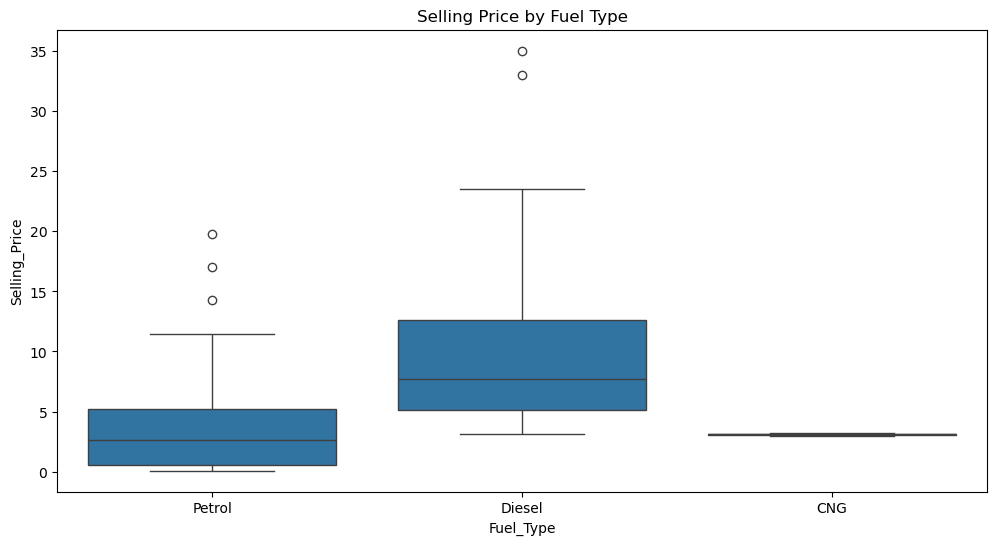

     Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0  2014.0           3.35           5.59     27000.0    0.0   
1  2013.0           4.75           9.54     43000.0    0.0   
2  2017.0           7.25           9.85      6900.0    0.0   
3  2011.0           2.85           4.15      5200.0    0.0   
4  2014.0           4.60           6.87     42450.0    0.0   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               False               False                   False   
1               False               False                   False   
2               False               False                   False   
3               False               False                   False   
4               False               False                   False   

   Car_Name_Bajaj Avenger 150  Car_Name_Bajaj Avenger 150 street  ...  \
0                       False                              False  ...   
1                       False                              False  

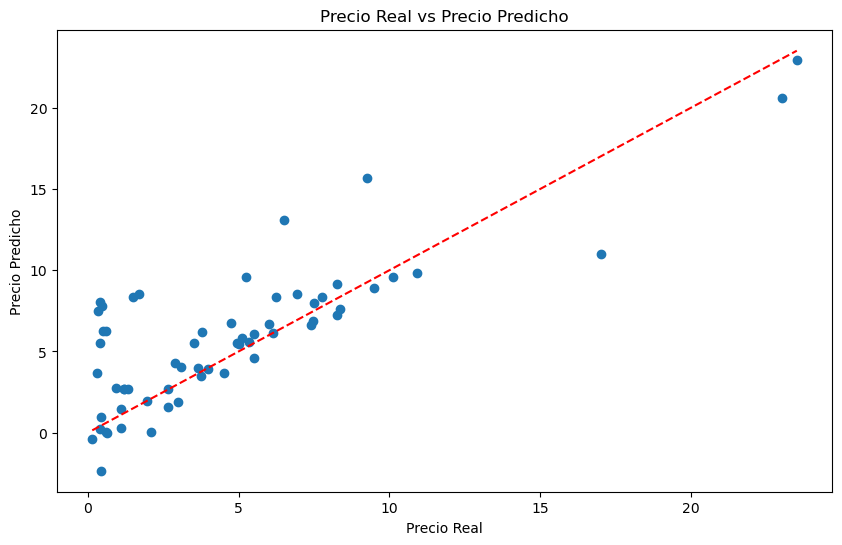

In [25]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Paso 1: Cargar los datos
df = pd.read_csv('car data.csv')

# Inspeccionar las primeras filas del DataFrame
print(df.head())
print(df.dtypes)

# Comprobar valores nulos
print(df.isnull().sum())

# Visualización de los datos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel_Type')
plt.title('Distribución de Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Boxplot para Selling_Price
plt.figure(figsize=(10, 6))
sns.boxplot(df['Selling_Price'])
plt.title('Boxplot of Selling Price')
plt.show()

# Tendencia de Selling Price a lo largo de los años
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Selling_Price', data=df)
plt.title('Selling Price over Years')
plt.show()

# Tendencia de Selling Price vs Kms Driven
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Selling Price vs Kms Driven')
plt.show()

# Boxplot para Selling_Price en función del tipo de combustible
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price by Fuel Type')
plt.show()

# Paso 2: Preprocesar los datos
# Eliminar cualquier fila completamente vacía si existe
df.dropna(how='all', inplace=True)

# Eliminar columnas con todos los valores faltantes, si existen
df.dropna(axis=1, how='all', inplace=True)

# Imputar valores faltantes para las columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Convertir variables categóricas a variables numéricas si es necesario
df = pd.get_dummies(df, drop_first=True)

# Inspeccionar los datos después del preprocesamiento
print(df.head())

# Paso 3: Selección de características
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Paso 4: División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Evaluación del rendimiento
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Paso 7: Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precio Real vs Precio Predicho')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

